In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Hands-on Activity 9.3: Sampling Estimates of Predictive Quantiles

## Objectives

- To estimate predictive quantiles.

## Estimating predictive quantiles

Take $X$ to be a random variable and $Y=g(X)$ a function of $X$.
The $q$-predictive quantile of $Y$ is defined to be the number $\mu_q$ for which:
$$
F(\mu_q) = p(Y \le \mu_q) = \frac{q}{100},
$$
where $F(y)$ was defined to be the CDF of $Y$.
For example, the 50\% quantile (also known as the median) is the value $\mu_50$ for which:
$$
F(\mu_{50}) = p(Y \le \mu_{50}) = \frac{50}{100} = 0.5.
$$
So, to find the quantiles we need to 1) know the CDF of $Y$ and 2) solve a root finding problem with $\mu_q$ as the unknown.
We have already seen how one can estimate the CDF from samples, so we would only have to worry about the root finding problem.
This is not terribly difficult to do, but since it is already implemented in ``numpy`` we are not going to bother with it.
So, here is how you can find the empirical quantiles of $Y$ for a specific example where $g(x)$ is given by the Example 3.4 of Robert & Casella (2004):
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$
and $X\sim U([0,1])$.

In [3]:
# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Maximum number of samples to take
max_n = 10000 
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

In [4]:
# Now let's, find the 50-percent quantile
mu_50 = np.quantile(y_samples, 50 / 100)
print('mu_50 = {0:1.2f}'.format(mu_50))

mu_50 = 0.58


In [5]:
# Let's find the 2.5-percent quantile
mu_025 = np.quantile(y_samples, 2.5 / 100)
print('mu_025 = {0:1.2f}'.format(mu_025))
# and the 97.5-percent quantile
mu_975 = np.quantile(y_samples, 97.5 / 100)
print('mu_975 = {0:1.2f}'.format(mu_975))

mu_025 = 0.00
mu_975 = 3.62


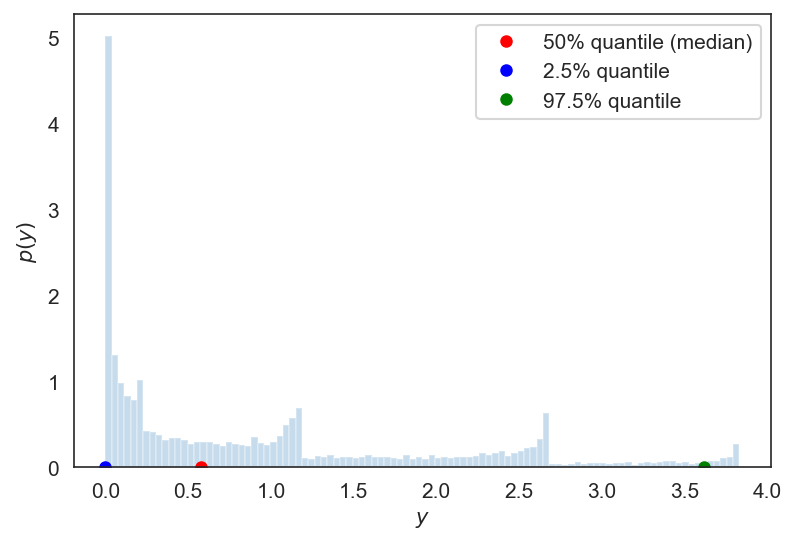

In [6]:
# Let's now mark these quantiles on the histogram of Y:
fig, ax = plt.subplots(dpi=150)
ax.hist(y_samples, density=True, alpha=0.25, bins=100);
ax.plot([mu_50], [0], 'ro', markersize=5, label='50% quantile (median)')
ax.plot([mu_025], [0], 'bo', markersize=5, label='2.5% quantile')
ax.plot([mu_975], [0], 'go', markersize=5, label='97.5% quantile')
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
plt.legend(loc='best');

Very often, the predictive intervals are summarized using box plots:

Text(0, 0.5, '$y$')

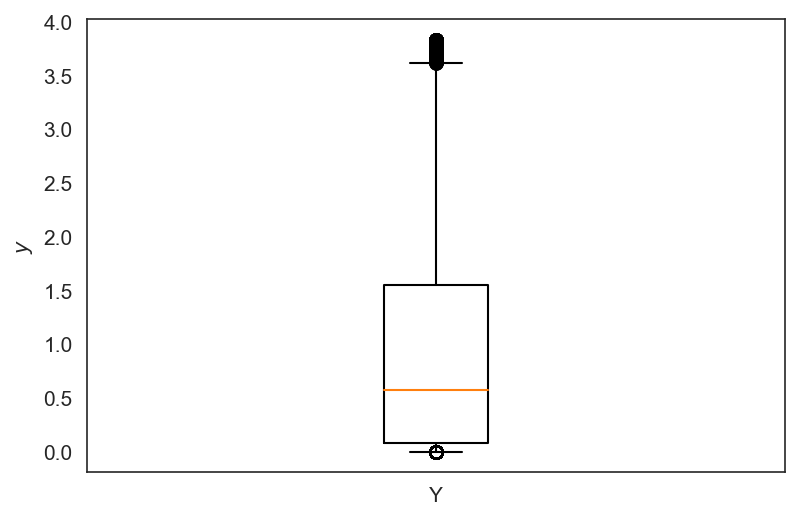

In [7]:
fig, ax = plt.subplots(dpi=150)
ax.boxplot(y_samples, whis=[2.5, 97.5], labels=['Y']);
ax.set_ylabel('$y$')

In the plot above, the $y$-axis indicates possible values, the median is shown as an orange line, the box encapsulates 50\% of the probability around the median, and the whiskers are extreme quantiles (here selected to be the 2.5\% and and 97.5\% quantiles). Finally, the plot also shows the samples that fall outside the extreme quantiles.

### Questions
+ How much probability do you have on the left of $\mu_{50}$, i.e., what is $p(Y \le \mu_{50})$?
    - 0.5
+ How much probability do you have on the right of $\mu_{50}$, i.e., what is $p(Y \le \mu_{50})$?
    - 0.5
+ How much probability do you have on the left of $\mu_{2.5}$?
    - 0.025
+ How much probability do you have on the right of $\mu_{97.5}$?
    - 0.025
+ How much probability do you have between $\mu_{2.5}$ and $\mu_{97.5}$?
    - 0.95
+ The predictive quantiles are a very nice way to summarize the probability density of a random variable with a few numbers.
For example, you can think of $\mu_{50}$ as a central value of $Y$.
Often, we call the interval $[\mu_{2.5}, \mu_{97.5}]$ the 95\% *predictive inteval*.
You can interpret this interval as $Y \in [\mu_{2.5}, \mu_{97.5}]$ with 95\% probability. Find a $99$\% predictive interval for the $Y$ of the example above.